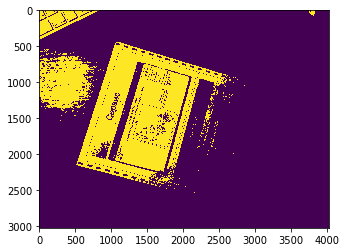

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

image = cv2.imread('IMG_5050.JPG',-1)
# paper = cv2.resize(image, (1000, 500))
paper = image
# ret, thresh_gray = cv2.threshold(cv2.cvtColor(paper, cv2.COLOR_BGR2GRAY),
#                         200, 255, cv2.THRESH_BINARY)
ret, thresh_gray = cv2.threshold(cv2.cvtColor(paper, cv2.COLOR_BGR2GRAY),
                                 200, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_gray);

In [11]:
sorted(list(map(lambda x: (x[0], cv2.contourArea(x[1])), enumerate(contours))),
                   key=lambda x: x[1], reverse=True)[:3]

[(4447, 1608077.0), (4283, 420448.0), (4515, 384080.0)]

In [8]:
contours, hier = cv2.findContours(thresh_gray, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
for i, _ in sorted(list(map(lambda x: (x[0], cv2.contourArea(x[1])), enumerate(contours))),
                   key=lambda x: x[1], reverse=True)[:3]:
    rect = cv2.minAreaRect(contours[i])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    paper = image.copy()
    cv2.drawContours(paper, [box], 0, (0, 255, 0), 10)
    cv2.imwrite('paper_{}.jpg'.format(i),paper)

In [35]:
contours, hier = cv2.findContours(thresh_gray, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
for c in contours:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    # draw a green 'nghien' rectangle
    cv2.drawContours(paper, [box], 0, (0, 255, 0),1)

cv2.imwrite('paper.jpg',paper)

True

In [23]:
contours, hier = cv2.findContours(thresh_gray, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

rect = cv2.minAreaRect(max(contours, key=lambda x: cv2.contourArea(x)))
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(paper, [box], 0, (0, 255, 0),1)

cv2.imwrite('paper.jpg',paper)

True